In [36]:
# Import dependencies
import pandas as pd
import numpy as np
import os
from sqlalchemy import create_engine
from databaseconfig import user_name, password, local_host
import datetime

In [37]:
# Connect to the database
connection_string = f'postgresql://{user_name}:{password}@{local_host}/flower-image-db'
engine = create_engine(connection_string)

In [38]:

# List the table names in stocks_db database
engine.table_names()

['tbl_files_images']

In [ ]:
image_path = 'orange_dahlia.jpg'

In [ ]:
stock_crypto_df_short.to_sql(name='stocks_merged', con=engine, if_exists='append', index=False)


In [1]:
import psycopg2
from config import config


def write_blob(part_id, path_to_file, file_extension):
    """ insert a BLOB into a table """
    conn = None
    try:
        # read data from a picture
        drawing = open(path_to_file, 'rb').read()
        # read database configuration
        params = config()
        # connect to the PostgresQL database
        conn = psycopg2.connect(**params)
        # create a new cursor object
        cur = conn.cursor()
        # execute the INSERT statement
        cur.execute("INSERT INTO part_drawings(part_id,file_extension,drawing_data) " +
                    "VALUES(%s,%s,%s)",
                    (part_id, file_extension, psycopg2.Binary(drawing)))
        # commit the changes to the database
        conn.commit()
        # close the communication with the PostgresQL database
        cur.close()
    except (Exception, psycopg2.DatabaseError) as error:
        print(error)
    finally:
        if conn is not None:
            conn.close()

ModuleNotFoundError: No module named 'config'

In [2]:
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

Using TensorFlow backend.


In [19]:
file = 'orange_dahlia.jpg'
x = load_img(file, target_size=(224,224))
x = img_to_array(x)
x /= 255
x = np.expand_dims(x, axis=0)
x

array([[[[0.13333334, 0.13725491, 0.11764706],
         [0.11372549, 0.11764706, 0.09803922],
         [0.10196079, 0.10588235, 0.08627451],
         ...,
         [0.07450981, 0.07843138, 0.05882353],
         [0.06666667, 0.06666667, 0.05882353],
         [0.0627451 , 0.0627451 , 0.05490196]],

        [[0.12941177, 0.13333334, 0.11372549],
         [0.1254902 , 0.12941177, 0.10980392],
         [0.14509805, 0.14901961, 0.12941177],
         ...,
         [0.0627451 , 0.06666667, 0.04705882],
         [0.06666667, 0.06666667, 0.05882353],
         [0.05882353, 0.05882353, 0.05098039]],

        [[0.14901961, 0.15294118, 0.13333334],
         [0.16862746, 0.17254902, 0.15294118],
         [0.16862746, 0.17254902, 0.15294118],
         ...,
         [0.05882353, 0.0627451 , 0.04313726],
         [0.05098039, 0.05098039, 0.04313726],
         [0.05098039, 0.05098039, 0.04313726]],

        ...,

        [[0.6745098 , 0.23137255, 0.09803922],
         [0.69803923, 0.2509804 , 0.10980392]

In [35]:
file = 'orange_dahlia.jpg'
x = load_img(file, target_size=(224,224))
# x=x.numpy()
# x = np.asarray(x)
x = img_to_array(x)
x /= 255
# x=x.numpy()
x = np.expand_dims(x, axis=0)
x

array([[[[0.13333334, 0.13725491, 0.11764706],
         [0.11372549, 0.11764706, 0.09803922],
         [0.10196079, 0.10588235, 0.08627451],
         ...,
         [0.07450981, 0.07843138, 0.05882353],
         [0.06666667, 0.06666667, 0.05882353],
         [0.0627451 , 0.0627451 , 0.05490196]],

        [[0.12941177, 0.13333334, 0.11372549],
         [0.1254902 , 0.12941177, 0.10980392],
         [0.14509805, 0.14901961, 0.12941177],
         ...,
         [0.0627451 , 0.06666667, 0.04705882],
         [0.06666667, 0.06666667, 0.05882353],
         [0.05882353, 0.05882353, 0.05098039]],

        [[0.14901961, 0.15294118, 0.13333334],
         [0.16862746, 0.17254902, 0.15294118],
         [0.16862746, 0.17254902, 0.15294118],
         ...,
         [0.05882353, 0.0627451 , 0.04313726],
         [0.05098039, 0.05098039, 0.04313726],
         [0.05098039, 0.05098039, 0.04313726]],

        ...,

        [[0.6745098 , 0.23137255, 0.09803922],
         [0.69803923, 0.2509804 , 0.10980392]

In [30]:
x.shape

(1, 224, 224, 3)

In [9]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_datasets as tfds
from PIL import Image
import pandas as pd
import numpy as np

In [20]:
image_path = 'orange_dahlia.jpg'
im = Image.open(image_path)
test_image = np.asarray(im)
image = tf.convert_to_tensor(test_image, dtype=tf.float32)
image = tf.image.resize(image, (224,224))
#Second, the pixel values of the input images are typically encoded as integers in the range 0-255, but the model expects the pixel values to be floats in the range 0-1. 
# #Therefore, you'll also need to normalize the pixel values
image /= 255

image = image.numpy()
image
processed_test_image = np.expand_dims(image, axis=0)
processed_test_image


array([[[[0.13564426, 0.13956583, 0.11995798],
         [0.11470463, 0.1186262 , 0.09901836],
         [0.10245848, 0.10638005, 0.08677221],
         ...,
         [0.07482491, 0.07874648, 0.05913864],
         [0.06726065, 0.06726065, 0.05941751],
         [0.06123944, 0.06123944, 0.05339631]],

        [[0.12979567, 0.13371724, 0.11410939],
         [0.12030437, 0.12422594, 0.10461809],
         [0.13890682, 0.14282839, 0.12322054],
         ...,
         [0.06488094, 0.06880251, 0.04919466],
         [0.06789213, 0.06789213, 0.06004899],
         [0.0591386 , 0.0591386 , 0.05129547]],

        [[0.14667368, 0.15059525, 0.1309874 ],
         [0.16575631, 0.16967788, 0.15007004],
         [0.16795969, 0.17188126, 0.15227342],
         ...,
         [0.05889105, 0.06281262, 0.04320478],
         [0.05175694, 0.05175694, 0.04391381],
         [0.05081907, 0.05081907, 0.04297594]],

        ...,

        [[0.67317986, 0.23052667, 0.09972043],
         [0.6963173 , 0.24985372, 0.10986771]

In [24]:
import os
top_k = 5
model = 'my_model2'
# model_path = os.path.join(app.root_path, model)
reloaded_keras_model = tf.saved_model.load(model)
predictions = reloaded_keras_model(processed_test_image)
predictions = np.array(predictions)
# Get the index of the top 10 probabilities
top_idxs = predictions[0].argsort()[-top_k:][::-1]

# Get the top 10 probabilities
top_probabilities = predictions[0][top_idxs]
probs = top_probabilities

# Get the labels (the index of the probabilities)
labels_nums = [str(idx) for idx in top_idxs]
classes = labels_nums

class_names = {"21": "fire lily", "3": "canterbury bells", "45": "bolero deep blue", "1": "pink primrose", "34": "mexican aster", "27": "prince of wales feathers", "7": "moon orchid", "16": "globe-flower", "25": "grape hyacinth", "26": "corn poppy", "79": "toad lily", "39": "siam tulip", "24": "red ginger", "67": "spring crocus", "35": "alpine sea holly", "32": "garden phlox", "10": "globe thistle", "6": "tiger lily", "93": "ball moss", "33": "love in the mist", "9": "monkshood", "102": "blackberry lily", "14": "spear thistle", "19": "balloon flower", "100": "blanket flower", "13": "king protea", "49": "oxeye daisy", "15": "yellow iris", "61": "cautleya spicata", "31": "carnation", "64": "silverbush", "68": "bearded iris", "63": "black-eyed susan", "69": "windflower", "62": "japanese anemone", "20": "giant white arum lily", "38": "great masterwort", "4": "sweet pea", "86": "tree mallow", "101": "trumpet creeper", "42": "daffodil", "22": "pincushion flower", "2": "hard-leaved pocket orchid", "54": "sunflower", "66": "osteospermum", "70": "tree poppy", "85": "desert-rose", "99": "bromelia", "87": "magnolia", "5": "english marigold", "92": "bee balm", "28": "stemless gentian", "97": "mallow", "57": "gaura", "40": "lenten rose", "47": "marigold", "59": "orange dahlia", "48": "buttercup", "55": "pelargonium", "36": "ruby-lipped cattleya", "91": "hippeastrum", "29": "artichoke", "71": "gazania", "90": "canna lily", "18": "peruvian lily", "98": "mexican petunia", "8": "bird of paradise", "30": "sweet william", "17": "purple coneflower", "52": "wild pansy", "84": "columbine", "12": "colt's foot", "11": "snapdragon", "96": "camellia", "23": "fritillary", "50": "common dandelion", "44": "poinsettia", "53": "primula", "72": "azalea", "65": "californian poppy", "80": "anthurium", "76": "morning glory", "37": "cape flower", "56": "bishop of llandaff", "60": "pink-yellow dahlia", "82": "clematis", "58": "geranium", "75": "thorn apple", "41": "barbeton daisy", "95": "bougainvillea", "43": "sword lily", "83": "hibiscus", "78": "lotus lotus", "88": "cyclamen", "94": "foxglove", "81": "frangipani", "74": "rose", "89": "watercress", "73": "water lily", "46": "wallflower", "77": "passion flower", "51": "petunia"}
new_class_names = {}
for key in class_names:
#     print(key)
    new_class_names[int(key)-1]=class_names[key]
new_class_names
label_names = [new_class_names[int(i)] for i in classes]
print(label_names)

['orange dahlia', 'osteospermum', 'english marigold', 'pink-yellow dahlia', 'gazania']


In [28]:
# array = reloaded_keras_model(x)
predictions = reloaded_keras_model(x)
predictions = np.array(predictions)
# Get the index of the top 10 probabilities
top_idxs = predictions[0].argsort()[-top_k:][::-1]

# Get the top 10 probabilities
top_probabilities = predictions[0][top_idxs]
probs = top_probabilities

# Get the labels (the index of the probabilities)
labels_nums = [str(idx) for idx in top_idxs]
classes = labels_nums

class_names = {"21": "fire lily", "3": "canterbury bells", "45": "bolero deep blue", "1": "pink primrose", "34": "mexican aster", "27": "prince of wales feathers", "7": "moon orchid", "16": "globe-flower", "25": "grape hyacinth", "26": "corn poppy", "79": "toad lily", "39": "siam tulip", "24": "red ginger", "67": "spring crocus", "35": "alpine sea holly", "32": "garden phlox", "10": "globe thistle", "6": "tiger lily", "93": "ball moss", "33": "love in the mist", "9": "monkshood", "102": "blackberry lily", "14": "spear thistle", "19": "balloon flower", "100": "blanket flower", "13": "king protea", "49": "oxeye daisy", "15": "yellow iris", "61": "cautleya spicata", "31": "carnation", "64": "silverbush", "68": "bearded iris", "63": "black-eyed susan", "69": "windflower", "62": "japanese anemone", "20": "giant white arum lily", "38": "great masterwort", "4": "sweet pea", "86": "tree mallow", "101": "trumpet creeper", "42": "daffodil", "22": "pincushion flower", "2": "hard-leaved pocket orchid", "54": "sunflower", "66": "osteospermum", "70": "tree poppy", "85": "desert-rose", "99": "bromelia", "87": "magnolia", "5": "english marigold", "92": "bee balm", "28": "stemless gentian", "97": "mallow", "57": "gaura", "40": "lenten rose", "47": "marigold", "59": "orange dahlia", "48": "buttercup", "55": "pelargonium", "36": "ruby-lipped cattleya", "91": "hippeastrum", "29": "artichoke", "71": "gazania", "90": "canna lily", "18": "peruvian lily", "98": "mexican petunia", "8": "bird of paradise", "30": "sweet william", "17": "purple coneflower", "52": "wild pansy", "84": "columbine", "12": "colt's foot", "11": "snapdragon", "96": "camellia", "23": "fritillary", "50": "common dandelion", "44": "poinsettia", "53": "primula", "72": "azalea", "65": "californian poppy", "80": "anthurium", "76": "morning glory", "37": "cape flower", "56": "bishop of llandaff", "60": "pink-yellow dahlia", "82": "clematis", "58": "geranium", "75": "thorn apple", "41": "barbeton daisy", "95": "bougainvillea", "43": "sword lily", "83": "hibiscus", "78": "lotus lotus", "88": "cyclamen", "94": "foxglove", "81": "frangipani", "74": "rose", "89": "watercress", "73": "water lily", "46": "wallflower", "77": "passion flower", "51": "petunia"}
new_class_names = {}
for key in class_names:
#     print(key)
    new_class_names[int(key)-1]=class_names[key]
new_class_names
label_names = [new_class_names[int(i)] for i in classes]
print(label_names)

['orange dahlia', 'osteospermum', 'english marigold', 'blanket flower', 'bishop of llandaff']


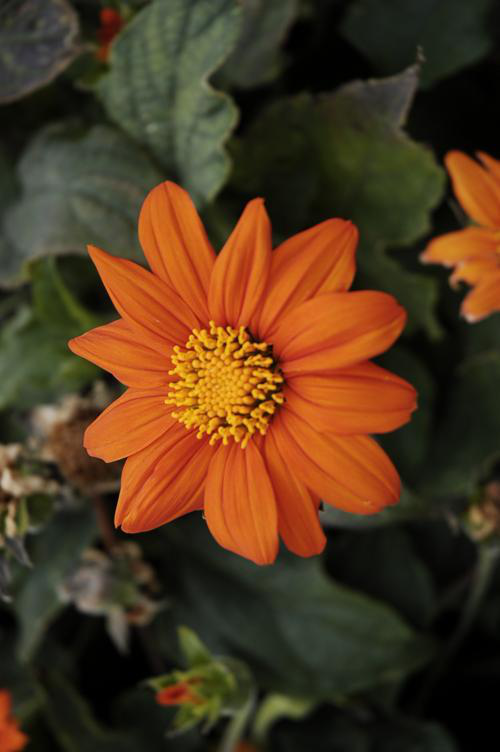

In [29]:
im